In [1]:
!pip install pyforest 
from pyforest import *
lazy_imports()

['import matplotlib as mpl',
 'from scipy import stats',
 'import datetime as dt',
 'import pandas as pd',
 'import dash',
 'from sklearn.cluster import KMeans',
 'from sklearn.ensemble import RandomForestRegressor',
 'import spacy',
 'import sklearn',
 'from sklearn.linear_model import ElasticNet',
 'import random',
 'from pyspark import SparkContext',
 'import imutils',
 'import gensim',
 'import matplotlib.pyplot as plt',
 'from sklearn.manifold import TSNE',
 'from statsmodels.tsa.arima_model import ARIMA',
 'from fbprophet import Prophet',
 'from sklearn.linear_model import LassoCV',
 'from dask import dataframe as dd',
 'from sklearn.preprocessing import LabelEncoder',
 'from sklearn.model_selection import train_test_split',
 'from sklearn.linear_model import ElasticNetCV',
 'from scipy import signal as sg',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import fastai',
 'from sklearn.model_selection import StratifiedKFold',
 'import altair as alt',
 'from path

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('Dataset11-Weather-Data.csv')
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [4]:
df.shape

(8784, 8)

In [5]:
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [7]:
df.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [15]:
[column for column in df]

['Date/Time',
 'Temp_C',
 'Dew Point Temp_C',
 'Rel Hum_%',
 'Wind Speed_km/h',
 'Visibility_km',
 'Press_kPa',
 'Weather']

In [16]:
df.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

### types of weathers

In [25]:
df.Weather.value_counts()   # there are many different categories in indisprotiate so we have to make in proportiate equally

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

In [19]:
df.Weather.unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [37]:
df.Weather.unique().tolist()

['Fog',
 'Freezing Drizzle,Fog',
 'Mostly Cloudy',
 'Cloudy',
 'Rain',
 'Rain Showers',
 'Mainly Clear',
 'Snow Showers',
 'Snow',
 'Clear',
 'Freezing Rain,Fog',
 'Freezing Rain',
 'Freezing Drizzle',
 'Rain,Snow',
 'Moderate Snow',
 'Freezing Drizzle,Snow',
 'Freezing Rain,Snow Grains',
 'Snow,Blowing Snow',
 'Freezing Fog',
 'Haze',
 'Rain,Fog',
 'Drizzle,Fog',
 'Drizzle',
 'Freezing Drizzle,Haze',
 'Freezing Rain,Haze',
 'Snow,Haze',
 'Snow,Fog',
 'Snow,Ice Pellets',
 'Rain,Haze',
 'Thunderstorms,Rain',
 'Thunderstorms,Rain Showers',
 'Thunderstorms,Heavy Rain Showers',
 'Thunderstorms,Rain Showers,Fog',
 'Thunderstorms',
 'Thunderstorms,Rain,Fog',
 'Thunderstorms,Moderate Rain Showers,Fog',
 'Rain Showers,Fog',
 'Rain Showers,Snow Showers',
 'Snow Pellets',
 'Rain,Snow,Fog',
 'Moderate Rain,Fog',
 'Freezing Rain,Ice Pellets,Fog',
 'Drizzle,Ice Pellets,Fog',
 'Drizzle,Snow',
 'Rain,Ice Pellets',
 'Drizzle,Snow,Fog',
 'Rain,Snow Grains',
 'Rain,Snow,Ice Pellets',
 'Snow Showers,Fog'

In [24]:
df.Weather.nunique() # 50 unique categories are present in Weather column

50

### Converting weather categories into Standard categories

In [30]:
x = 'Thunderstorms,Moderate Rain Showers,Fog'

list = [w.split() for w in x.split(',')]
list

[['Thunderstorms'], ['Moderate', 'Rain', 'Showers'], ['Fog']]

In [35]:
flat_list= np.concatenate(list).tolist()   # np.concatenate(list)      # tolist()   
flat_list

['Thunderstorms', 'Moderate', 'Rain', 'Showers', 'Fog']

In [41]:
def create_list(x):      # flattening the list
    list_of_lists= [w.split() for w in x.split(',')]
    flat_list= np.concatenate(list_of_lists).tolist()
    return flat_list

In [61]:
def Get_Weather(list1):   # categoring the output
    if 'Fog' in list1 and 'Rain' in list1:
        return 'RAIN+FOG'
    elif 'Snow' in list1 and 'Rain' in list1:
        return 'RAIN+SNOW'
    elif 'Snow' in list1:
        return 'SNOW'
    elif 'Rain' in list1:
        return 'RAIN'
    elif 'Cloudy' in list1:
        return 'CLOUDY'
    elif 'Fog' in list1:
        return 'FOG'
    elif 'Clear' in list1:
        return 'CLEAR'
    elif 'Cloudly' in list1:
        return 'CLOUDLY'
    else:
        return 'RAIN'

In [62]:
create_list(x)

['Thunderstorms', 'Moderate', 'Rain', 'Showers', 'Fog']

In [63]:
Get_Weather(create_list(x))

'RAIN+FOG'

In [64]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,std_weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,FOG
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,FOG
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",FOG
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",FOG
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog,FOG


In [65]:
# creating new column by converting to categorical to list to than tomfinal stage

df['std_weather'] = df['Weather'].apply(lambda x : Get_Weather(create_list(x)))
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,std_weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,FOG
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,FOG
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",FOG
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",FOG
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog,FOG


In [66]:
df.std_weather.value_counts()

std_weather
CLOUDY       3797
CLEAR        3432
RAIN          603
SNOW          556
FOG           241
RAIN+FOG      129
RAIN+SNOW      26
Name: count, dtype: int64

### balancing data & sample selection 

In [76]:
# selecting 'CLOUDY' 600 records

df_cloudy = df[df.std_weather=='CLOUDY'].head(600)   # df_cloudy.head(600)
df_cloudy.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,std_weather
16,1/1/2012 16:00,2.6,-0.2,82,13,12.9,99.93,Mostly Cloudy,CLOUDY
17,1/1/2012 17:00,3.0,0.0,81,13,16.1,99.81,Cloudy,CLOUDY
20,1/1/2012 20:00,3.2,1.3,87,19,25.0,99.50,Cloudy,CLOUDY
21,1/1/2012 21:00,4.0,1.7,85,20,25.0,99.39,Cloudy,CLOUDY
23,1/1/2012 23:00,5.3,2.0,79,30,25.0,99.31,Cloudy,CLOUDY


In [75]:
df_cloudy.shape

(600, 9)

In [77]:
# selecting 'CLEAR' 600 records
df_clear = df[df.std_weather=='CLEAR'].head(600)   # df_clear.head(600)
df_clear.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,std_weather
36,1/2/2012 12:00,1.7,-6.2,56,48,24.1,99.21,Mainly Clear,CLEAR
60,1/3/2012 12:00,-14.9,-22.6,52,20,24.1,101.34,Mainly Clear,CLEAR
61,1/3/2012 13:00,-15.1,-22.4,54,22,24.1,101.34,Mainly Clear,CLEAR
62,1/3/2012 14:00,-14.9,-22.9,50,22,24.1,101.38,Mainly Clear,CLEAR
63,1/3/2012 15:00,-14.8,-22.2,53,19,24.1,101.44,Mainly Clear,CLEAR


In [78]:
df_clear.shape

(600, 9)

In [79]:
# selecting 'RAIN' and it has 603 records from df
df_rain = df[df.std_weather=='RAIN']
df_rain.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,std_weather
18,1/1/2012 18:00,3.8,1.0,82,15,12.9,99.74,Rain,RAIN
19,1/1/2012 19:00,3.1,1.3,88,15,12.9,99.68,Rain,RAIN
22,1/1/2012 22:00,4.4,1.9,84,24,19.3,99.32,Rain Showers,RAIN
24,1/2/2012 0:00,5.2,1.5,77,35,25.0,99.26,Rain Showers,RAIN
154,1/7/2012 10:00,-5.7,-8.0,84,7,8.0,100.13,Freezing Rain,RAIN


In [80]:
df_rain.shape

(603, 9)

In [81]:
# selecting 'SNOW' and it has 556 records from df
df_snow = df[df.std_weather=='SNOW']
df_snow.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,std_weather
41,1/2/2012 17:00,-2.1,-9.5,57,22,25.0,99.66,Snow Showers,SNOW
44,1/2/2012 20:00,-5.6,-13.4,54,24,25.0,100.07,Snow Showers,SNOW
45,1/2/2012 21:00,-5.8,-12.8,58,26,25.0,100.15,Snow Showers,SNOW
47,1/2/2012 23:00,-7.4,-14.1,59,17,19.3,100.27,Snow Showers,SNOW
48,1/3/2012 0:00,-9.0,-16.0,57,28,25.0,100.35,Snow Showers,SNOW


In [82]:
df_snow.shape

(556, 9)

### creating new weather dataset

In [86]:
df_1 = pd.concat([df_cloudy, df_clear, df_snow, df_rain] , axis=0)
df_1.shape

(2359, 9)

In [88]:
df_1.std_weather.value_counts()

std_weather
RAIN      603
CLOUDY    600
CLEAR     600
SNOW      556
Name: count, dtype: int64

### drop unwanted columns

In [89]:
df_1 = df_1.drop(columns=['Date/Time','Weather'], axis=1)
df_1.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,std_weather
16,2.6,-0.2,82,13,12.9,99.93,CLOUDY
17,3.0,0.0,81,13,16.1,99.81,CLOUDY
20,3.2,1.3,87,19,25.0,99.50,CLOUDY
21,4.0,1.7,85,20,25.0,99.39,CLOUDY
23,5.3,2.0,79,30,25.0,99.31,CLOUDY


### duplicated values

In [91]:
df_1.duplicated().sum()

0

### null / missing values

In [92]:
df_1.isnull().sum()

Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
std_weather         0
dtype: int64

In [93]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2359 entries, 16 to 8545
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Temp_C            2359 non-null   float64
 1   Dew Point Temp_C  2359 non-null   float64
 2   Rel Hum_%         2359 non-null   int64  
 3   Wind Speed_km/h   2359 non-null   int64  
 4   Visibility_km     2359 non-null   float64
 5   Press_kPa         2359 non-null   float64
 6   std_weather       2359 non-null   object 
dtypes: float64(4), int64(2), object(1)
memory usage: 147.4+ KB


### Data visualization

In [97]:
import warnings
warnings.filterwarnings("ignore")   # to stop showing errors

In [104]:
!pip install sweetviz
import sweetviz as sv
report1= sv.analyze(df_1)
report1.show_html('report1.html')

                                             |      | [  0%]   00:00 -> (? left)

Report report1.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


0:114: execution error: File some object wasn’t found. (-43)


In [105]:
df_1.to_csv('df_1.csv')

Shape of your Data Set loaded: (2359, 7)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    7 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
    All variables

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Temp_C,float64,0.000000,NA,-23.300000,26.700000,Column has 102 outliers greater than upper bound (19.15) or lower than lower bound(-23.65). Cap them or remove them.
Dew Point Temp_C,float64,0.000000,NA,-28.500000,23.100000,"Column has 19 outliers greater than upper bound (19.60) or lower than lower bound(-32.40). Cap them or remove them., Column has a high correlation with ['Temp_C']. Consider dropping one of them."
Rel Hum_%,int64,0.000000,2,37.000000,99.000000,No issue
Wind Speed_km/h,int64,0.000000,1,0.000000,83.000000,Column has 25 outliers greater than upper bound (44.00) or lower than lower bound(-12.00). Cap them or remove them.
Visibility_km,float64,0.000000,NA,0.600000,48.300000,Column has 359 outliers greater than upper bound (38.35) or lower than lower bound(2.75). Cap them or remove them.
Press_kPa,float64,0.000000,NA,97.520000,103.120000,Column has 32 outliers greater than upper bound (103.68) or lower than lower bound(98.30). Cap them or remove them.
std_weather,object,0.000000,0,,,No issue


Number of All Scatter Plots = 10


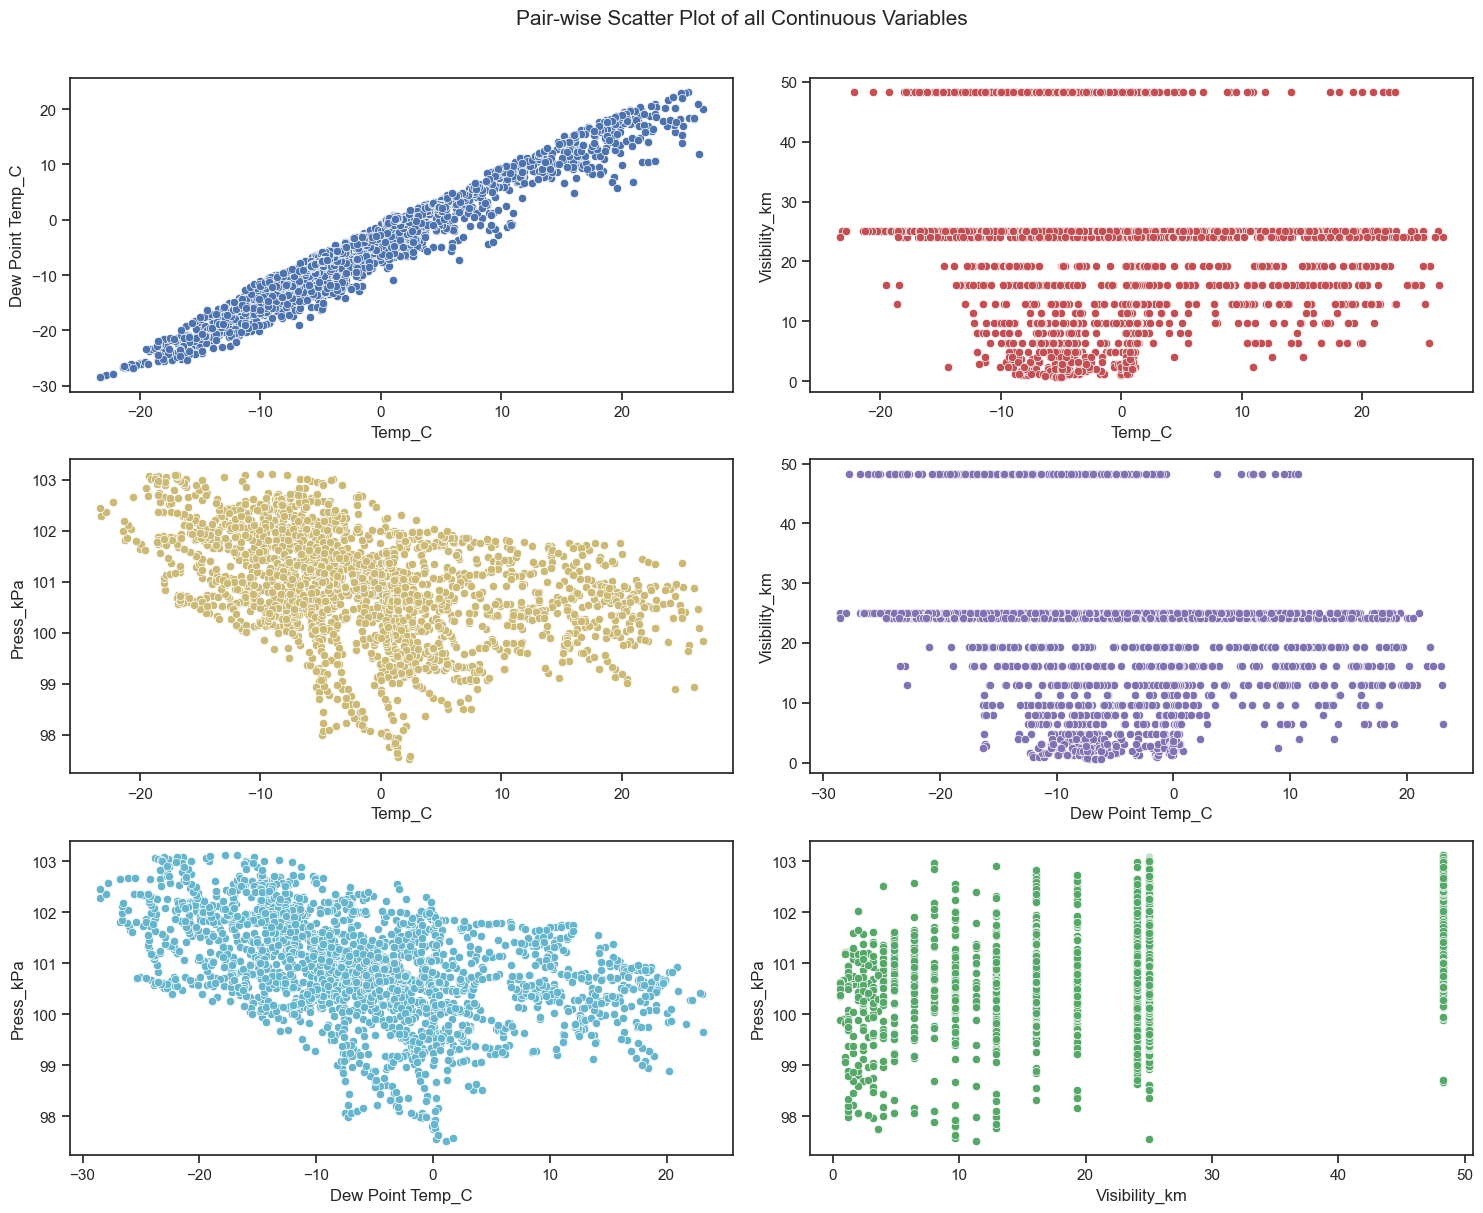

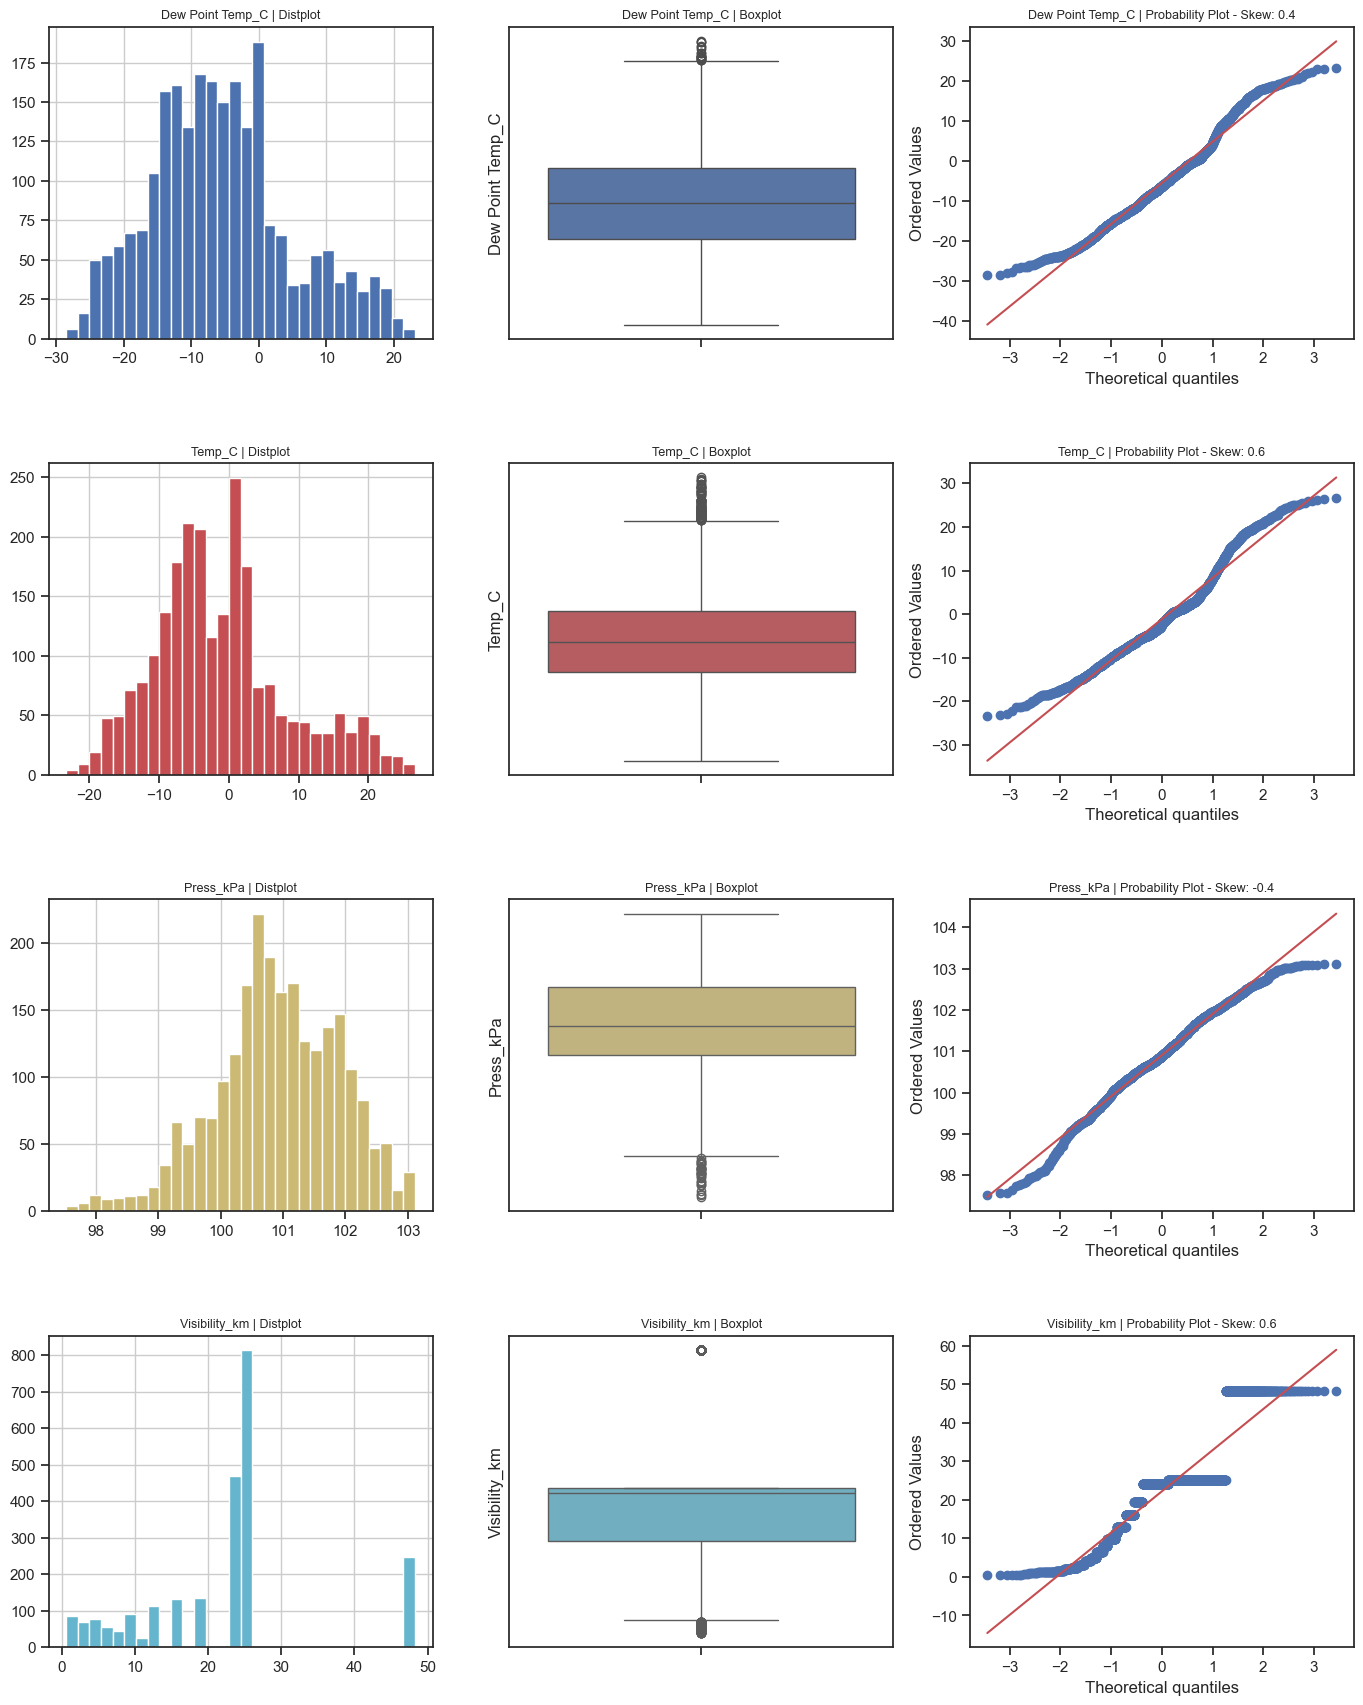

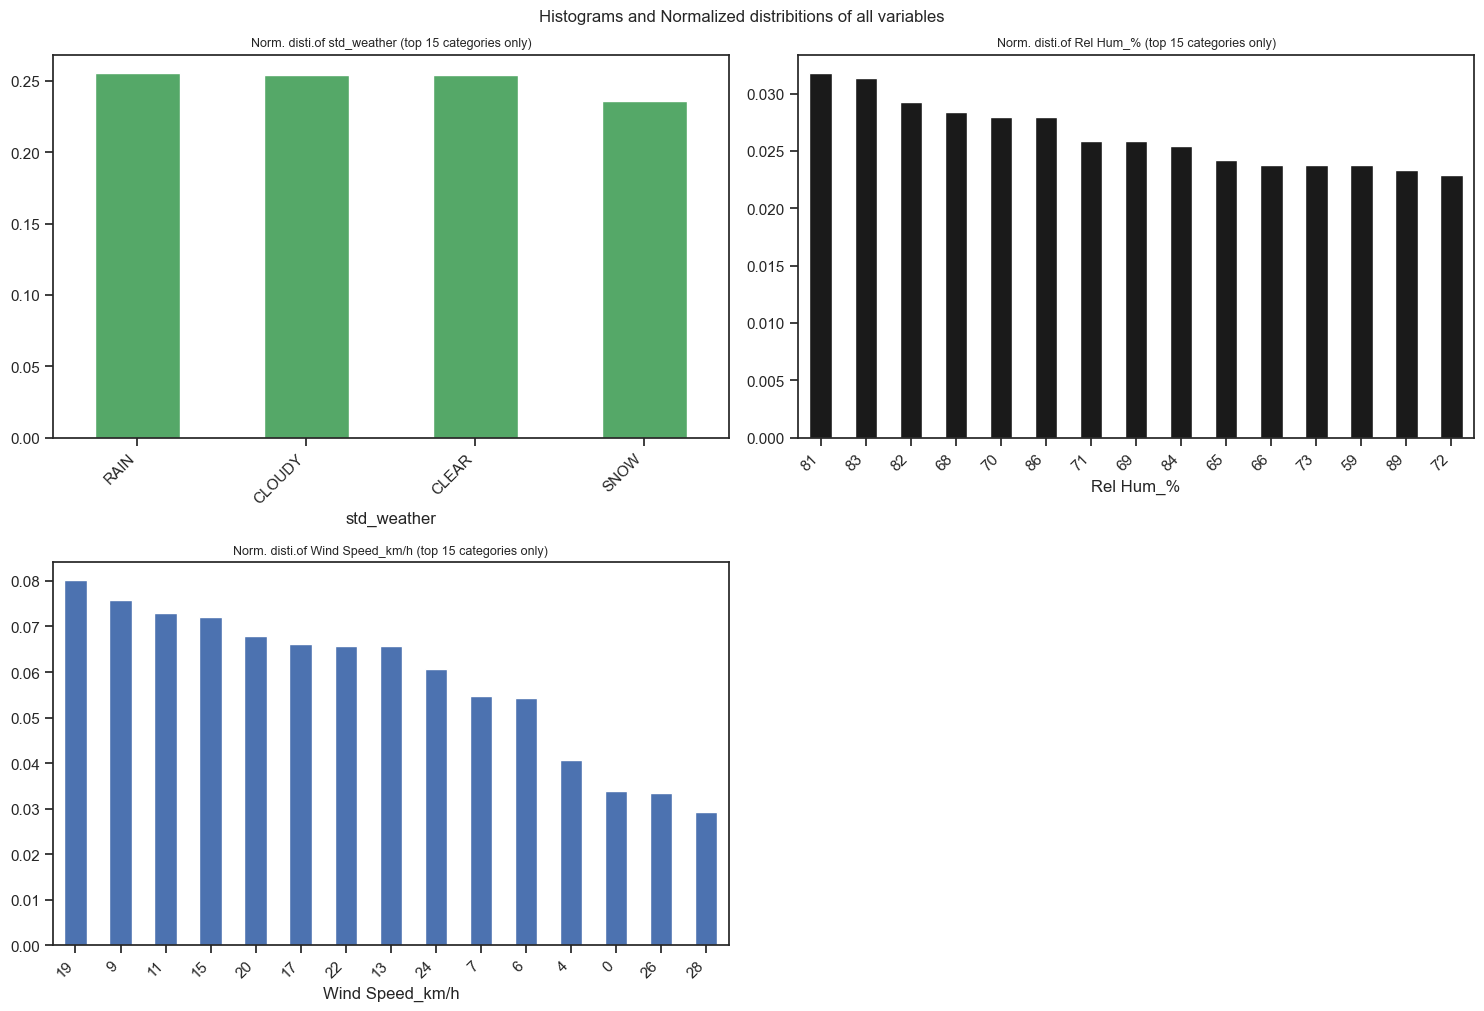

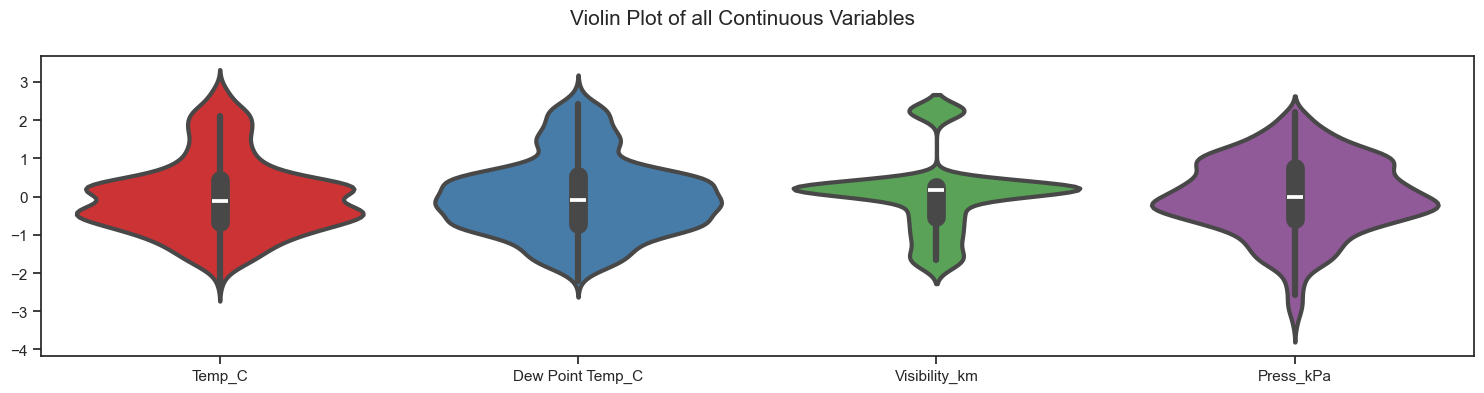

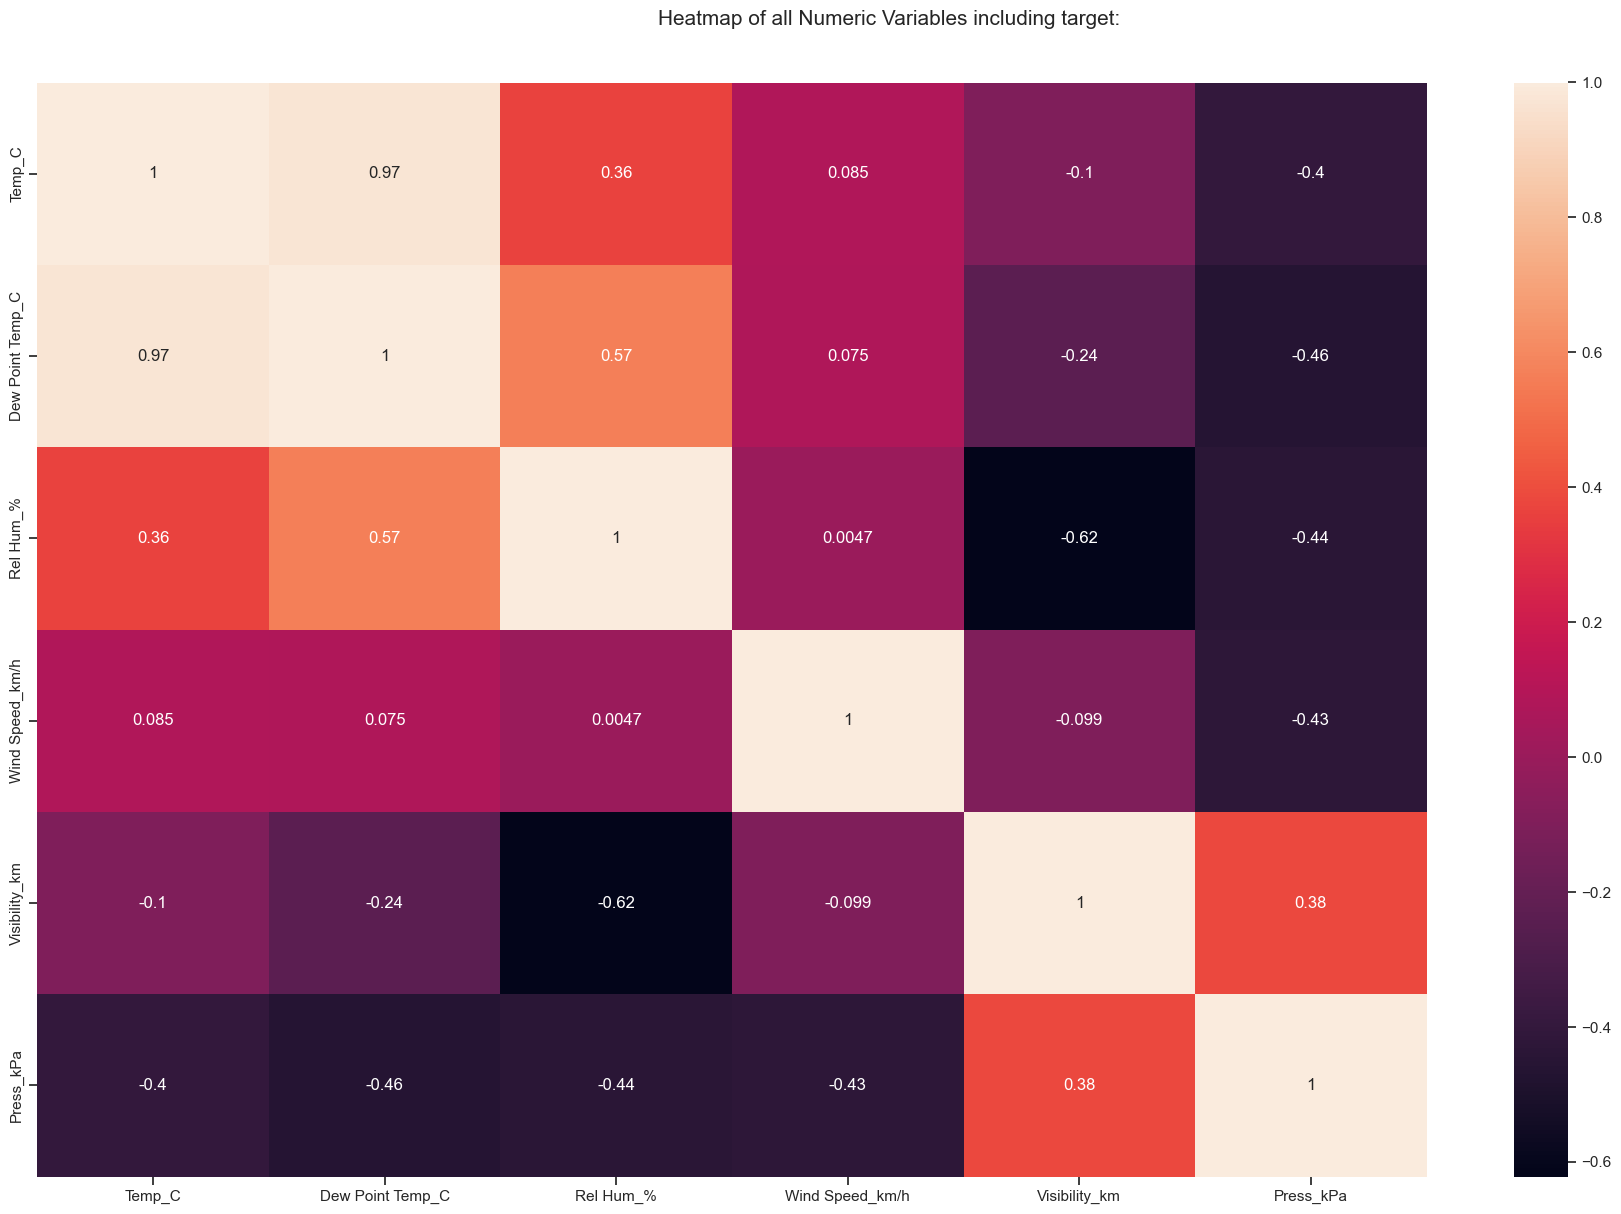

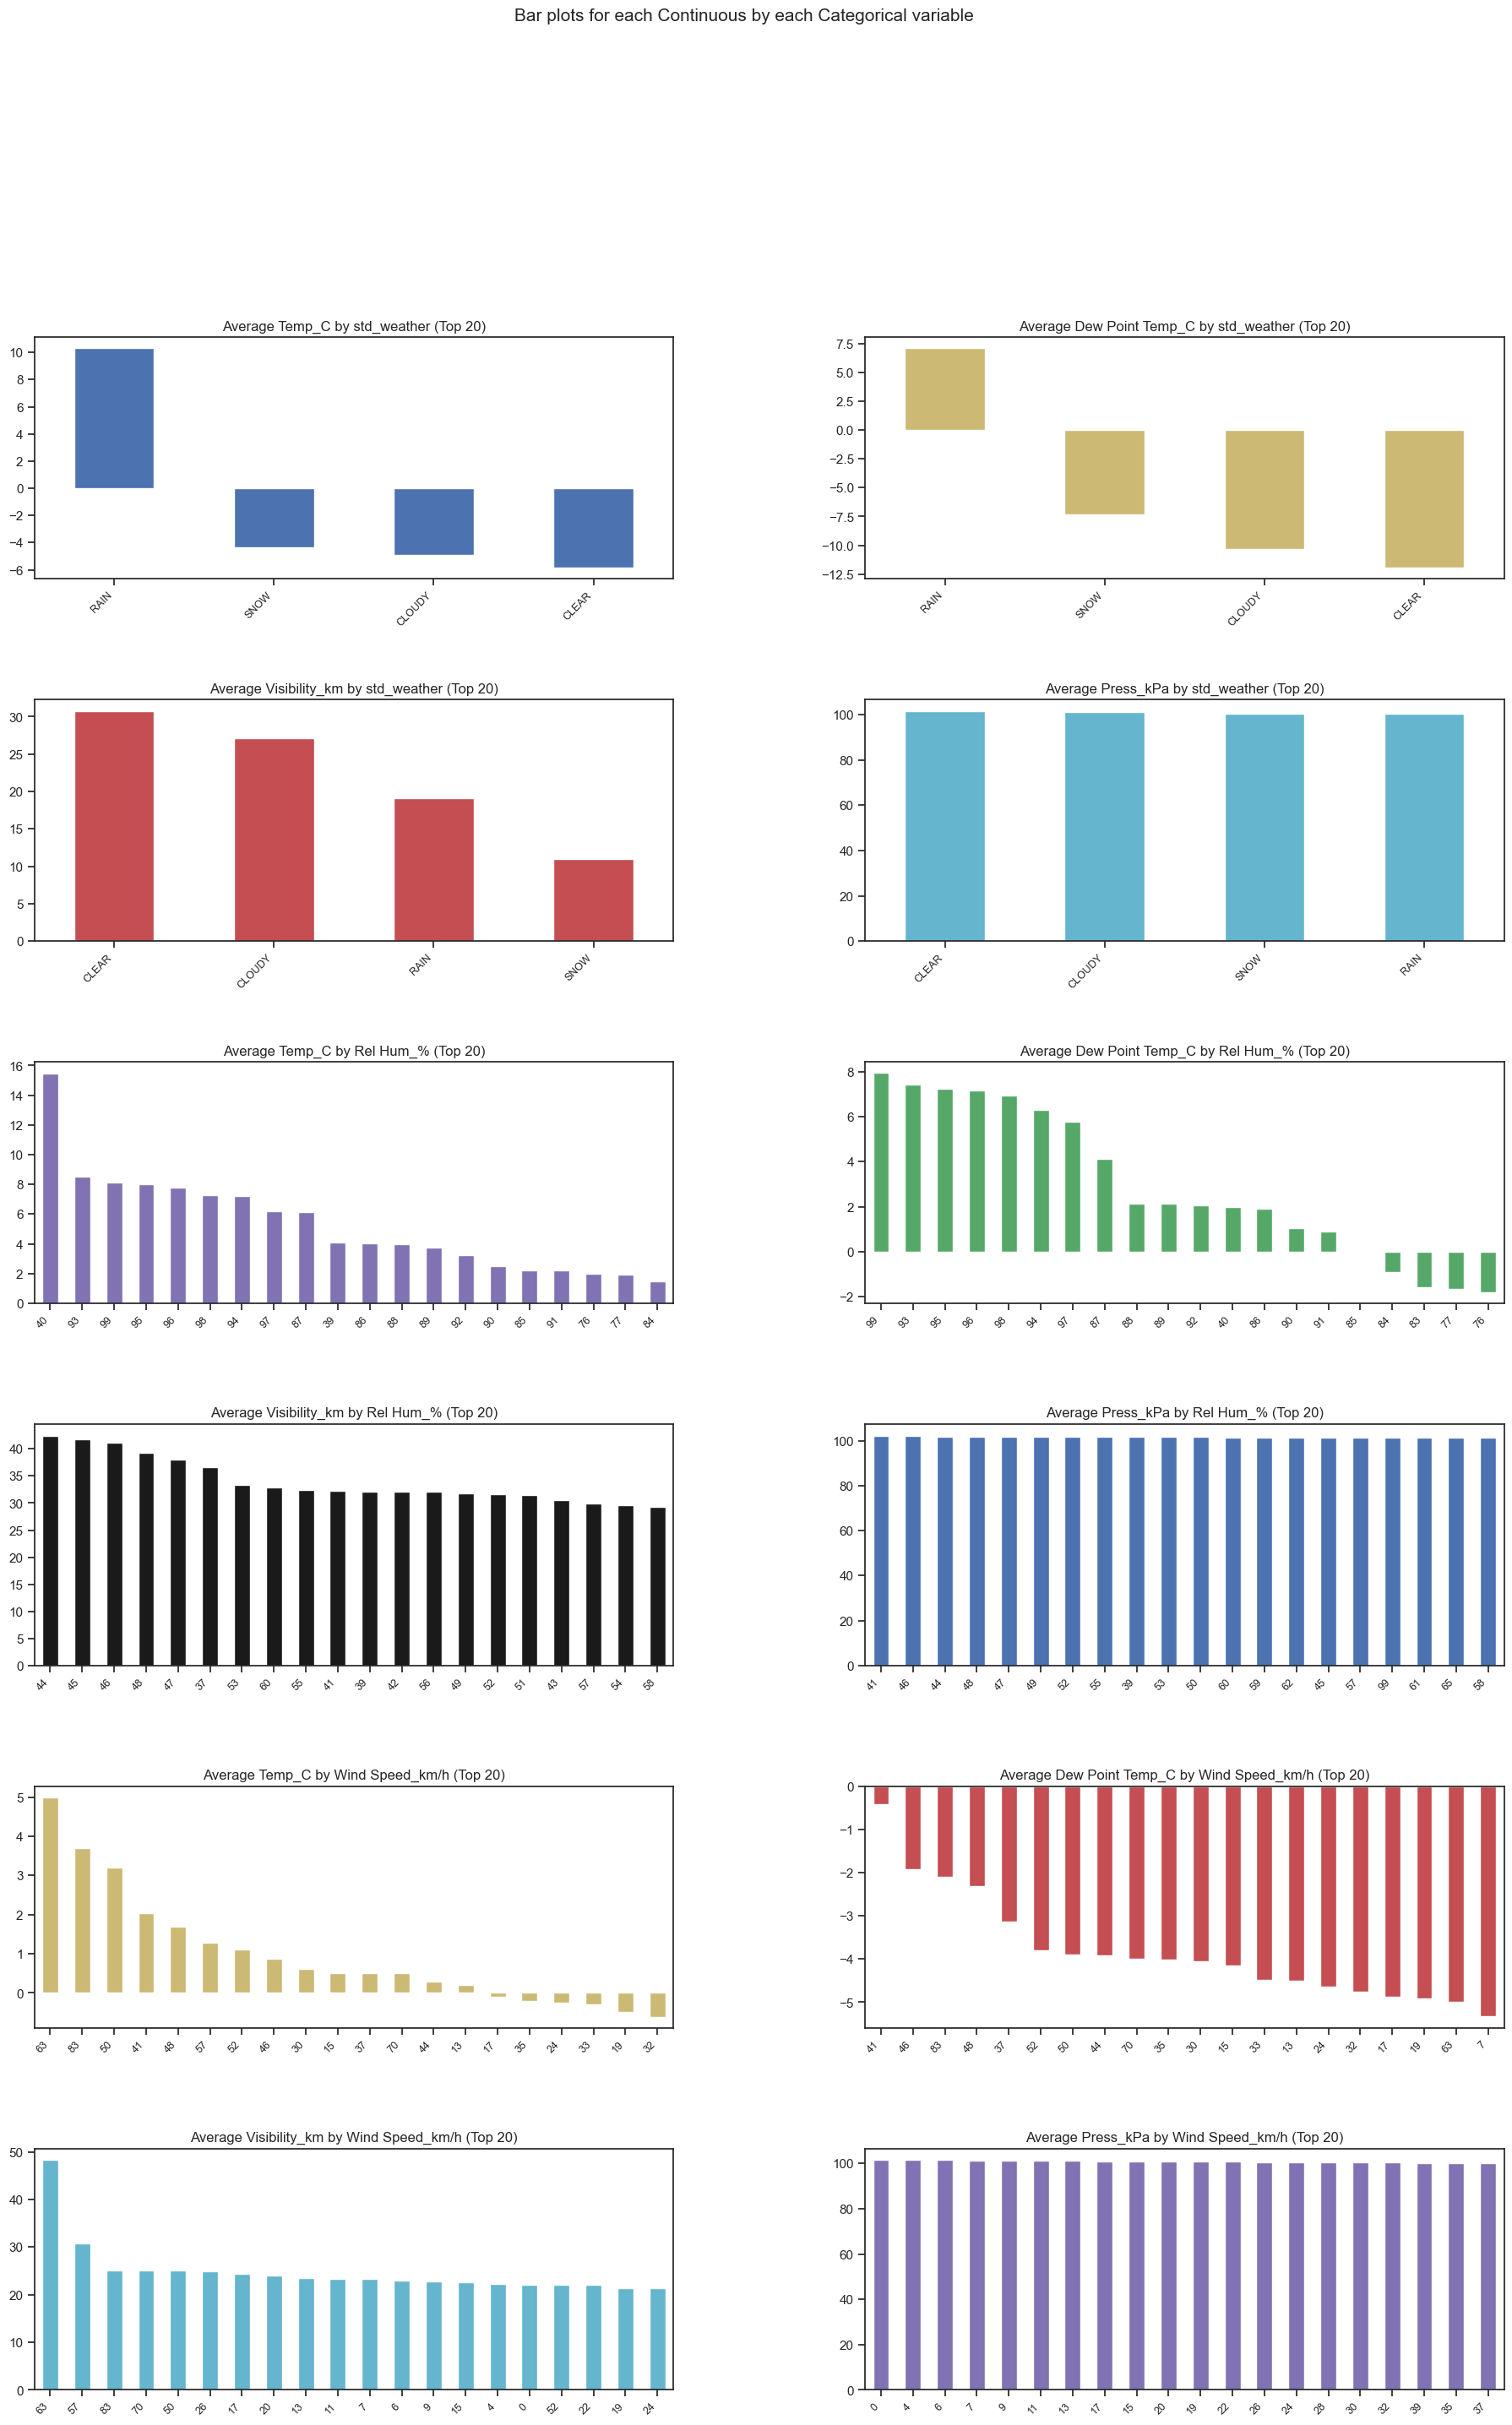

All Plots done
Time to run AutoViz = 3 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [115]:

!pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class
av=AutoViz_Class()
report2=av.AutoViz('',dfte=df_1)
report2

%matplotlib inline

In [116]:
df_1.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000
mean,-1.125095,-5.578465,72.507418,17.363290,22.167656,100.905295
std,9.596997,10.393091,13.333168,9.878817,11.628658,1.001026
min,-23.300000,-28.500000,37.000000,0.000000,0.600000,97.520000
25%,-7.600000,-12.900000,62.000000,9.000000,16.100000,100.320000
50%,-2.300000,-6.400000,73.000000,17.000000,24.100000,100.890000
75%,3.100000,0.100000,83.000000,23.000000,25.000000,101.665000
max,26.700000,23.100000,99.000000,83.000000,48.300000,103.120000


### correlation among the features

In [122]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2359 entries, 16 to 8545
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Temp_C            2359 non-null   float64
 1   Dew Point Temp_C  2359 non-null   float64
 2   Rel Hum_%         2359 non-null   int64  
 3   Wind Speed_km/h   2359 non-null   int64  
 4   Visibility_km     2359 non-null   float64
 5   Press_kPa         2359 non-null   float64
 6   std_weather       2359 non-null   object 
dtypes: float64(4), int64(2), object(1)
memory usage: 147.4+ KB


In [120]:
[x for x in df_1]  # columns

['Temp_C',
 'Dew Point Temp_C',
 'Rel Hum_%',
 'Wind Speed_km/h',
 'Visibility_km',
 'Press_kPa',
 'std_weather']

In [131]:
df_corr = df_1.drop(columns=['std_weather'], axis=1).corr()  # correlation between features
df_corr

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.973532,0.364307,0.084810,-0.101720,-0.401010
Dew Point Temp_C,0.973532,1.000000,0.566080,0.075326,-0.238155,-0.460990
Rel Hum_%,0.364307,0.566080,1.000000,0.004675,-0.621762,-0.442948
Wind Speed_km/h,0.084810,0.075326,0.004675,1.000000,-0.098739,-0.431598
Visibility_km,-0.101720,-0.238155,-0.621762,-0.098739,1.000000,0.379455
Press_kPa,-0.401010,-0.460990,-0.442948,-0.431598,0.379455,1.000000


### heatmap - relation

<IPython.core.display.Javascript object>

<Axes: >

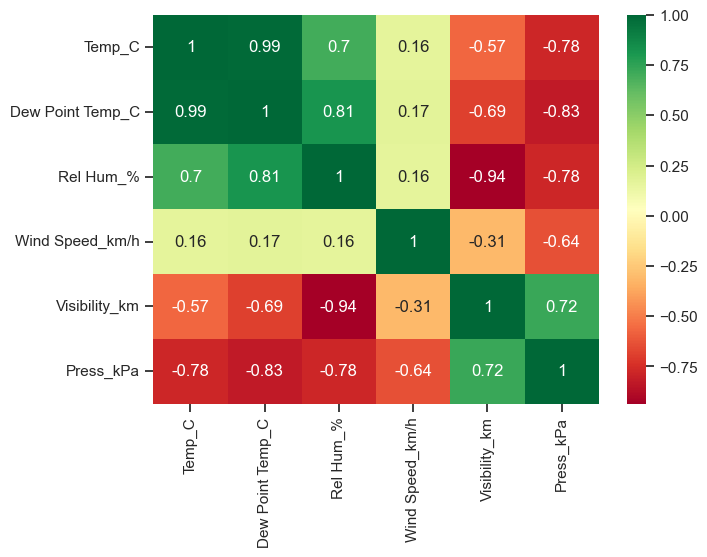

In [136]:
sns.heatmap(df_corr.corr(), annot=True, cmap='RdYlGn')

In [144]:
df_1.columns

Index(['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h',
       'Visibility_km', 'Press_kPa', 'std_weather'],
      dtype='object')

Text(0.5, 0, 'Temperature')

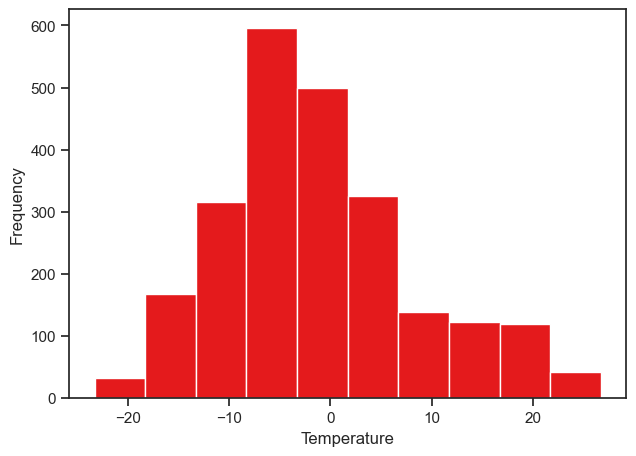

In [148]:
df_1['Temp_C'].plot(kind='hist')
plt.xlabel('Temperature')

Text(0.5, 0, 'Rel Hum_%')

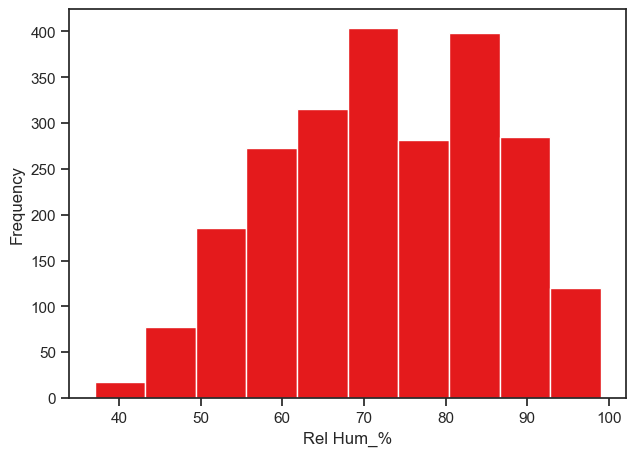

In [149]:
df_1['Rel Hum_%'].plot(kind='hist')
plt.xlabel('Rel Hum_%')

Text(0.5, 0, 'Wind Speed_km/h')

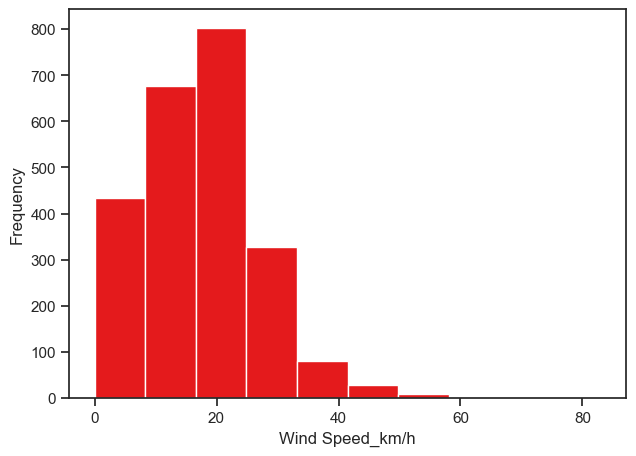

In [150]:
df_1['Wind Speed_km/h'].plot(kind='hist')
plt.xlabel('Wind Speed_km/h')

Text(0.5, 0, 'Visibility_km')

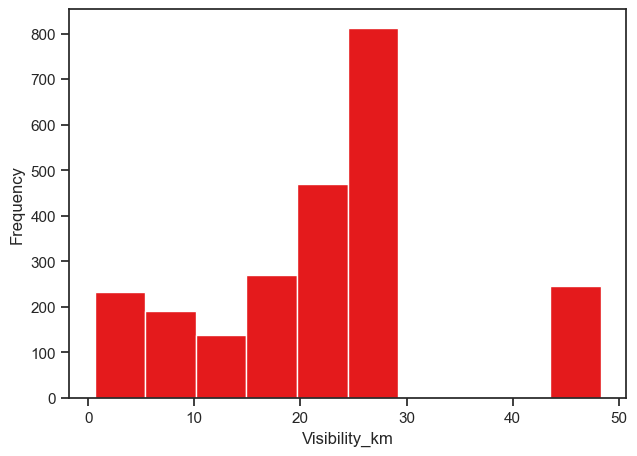

In [151]:
df_1['Visibility_km'].plot(kind='hist')
plt.xlabel('Visibility_km')

<Axes: >

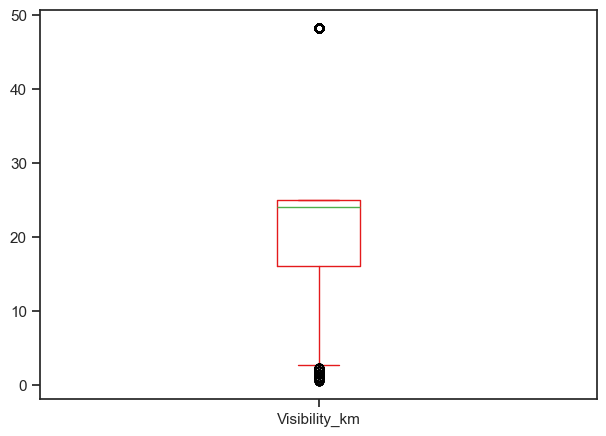

In [153]:
df_1['Visibility_km'].plot(kind='box')

<Axes: >

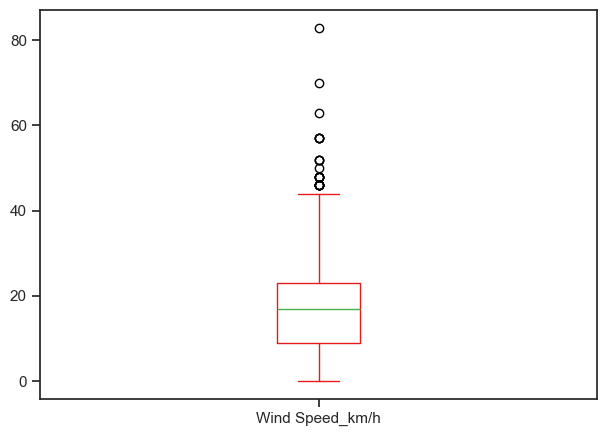

In [154]:
df_1['Wind Speed_km/h'].plot(kind='box')

In [155]:
df_1.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,std_weather
16,2.6,-0.2,82,13,12.9,99.93,CLOUDY
17,3.0,0.0,81,13,16.1,99.81,CLOUDY
20,3.2,1.3,87,19,25.0,99.50,CLOUDY
21,4.0,1.7,85,20,25.0,99.39,CLOUDY
23,5.3,2.0,79,30,25.0,99.31,CLOUDY


### Label Encoding
#### *converting target category/variable into numeric

In [171]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df_2=df_1.copy()

df_2['weather_std'] = le.fit_transform(df_1['std_weather'])  # fitting & transforming data
# df_2['weather_std'] = df_2['std_weather'].apply(lambda x: le.fit(x))

df_2=df_2.drop(columns=['std_weather'], axis=1)  # droping unwanted column fron new datafram
df_2.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,weather_std
16,2.6,-0.2,82,13,12.9,99.93,1
17,3.0,0.0,81,13,16.1,99.81,1
20,3.2,1.3,87,19,25.0,99.50,1
21,4.0,1.7,85,20,25.0,99.39,1
23,5.3,2.0,79,30,25.0,99.31,1


In [176]:
le.classes_    # classes are

array(['CLEAR', 'CLOUDY', 'RAIN', 'SNOW'], dtype=object)

In [177]:
df_2.weather_std.value_counts()

weather_std
2    603
1    600
0    600
3    556
Name: count, dtype: int64

### x-independent  ,y-dependent variables 

In [179]:
x= df_2.drop(columns=['weather_std'], axis=1)
x.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
16,2.6,-0.2,82,13,12.9,99.93
17,3.0,0.0,81,13,16.1,99.81
20,3.2,1.3,87,19,25.0,99.50
21,4.0,1.7,85,20,25.0,99.39
23,5.3,2.0,79,30,25.0,99.31


In [180]:
y=df_2['weather_std']
y.head()

16    1
17    1
20    1
21    1
23    1
Name: weather_std, dtype: int64

### Feature Scaling

In [185]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_1=sc.fit_transform(x)
x_1

array([[ 0.38823448,  0.51761366,  0.71210338, -0.441775  , -0.79713588,
        -0.97450188],
       [ 0.42992302,  0.53686129,  0.63708655, -0.441775  , -0.52189532,
        -1.09440434],
       [ 0.45076729,  0.66197091,  1.08718754,  0.16571391,  0.24361751,
        -1.40415236],
       ...,
       [ 0.36739021,  0.70046618,  1.68732218, -0.2392787 , -1.07237645,
        -3.32259175],
       [ 0.25274672,  0.57535656,  1.61230535,  0.46945837, -1.07237645,
        -3.26264052],
       [ 0.24232458,  0.54648511,  1.46227169,  1.27944359, -0.79713588,
        -3.06280308]])

### spliting data into train & test

In [186]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.2, random_state=45)

In [188]:
x_train.shape,  x_test.shape

((1887, 6), (472, 6))

### model_building

In [190]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model=DecisionTreeClassifier()

### model_training

In [191]:
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

### model_prediction

In [195]:
y_pred=decision_tree_model.predict(x_test)
y_pred

array([2, 3, 0, 3, 0, 2, 0, 1, 3, 0, 0, 2, 1, 2, 2, 1, 2, 2, 1, 0, 0, 1,
       1, 3, 2, 1, 1, 0, 0, 3, 3, 3, 3, 1, 0, 0, 2, 1, 0, 2, 1, 0, 3, 0,
       1, 1, 1, 1, 0, 3, 2, 3, 3, 1, 0, 1, 2, 0, 1, 2, 0, 1, 3, 0, 2, 1,
       0, 2, 0, 3, 2, 3, 1, 3, 2, 2, 1, 1, 3, 3, 3, 3, 3, 3, 2, 0, 2, 0,
       0, 2, 1, 2, 2, 2, 2, 2, 1, 0, 1, 2, 3, 3, 0, 2, 3, 2, 2, 2, 0, 1,
       1, 1, 0, 3, 2, 3, 1, 1, 0, 0, 3, 1, 2, 2, 3, 1, 2, 3, 1, 1, 1, 2,
       2, 3, 2, 0, 3, 2, 3, 0, 2, 0, 0, 0, 1, 3, 1, 2, 2, 2, 1, 2, 2, 2,
       0, 2, 2, 1, 3, 2, 2, 3, 2, 0, 2, 2, 2, 0, 0, 3, 3, 0, 3, 2, 0, 1,
       2, 1, 3, 3, 0, 2, 1, 1, 1, 2, 2, 0, 1, 1, 0, 1, 0, 2, 0, 2, 2, 3,
       1, 2, 0, 2, 1, 1, 1, 3, 2, 0, 2, 2, 1, 1, 0, 2, 2, 1, 0, 2, 2, 1,
       1, 0, 1, 1, 1, 2, 0, 3, 1, 0, 2, 3, 0, 3, 3, 0, 1, 3, 2, 3, 2, 0,
       1, 2, 0, 0, 0, 2, 2, 0, 3, 1, 0, 0, 2, 3, 1, 0, 3, 3, 2, 0, 3, 1,
       2, 0, 0, 1, 3, 3, 3, 3, 2, 1, 1, 3, 0, 1, 1, 1, 3, 1, 3, 1, 2, 3,
       3, 0, 1, 0, 1, 3, 1, 1, 3, 2, 1, 2, 3, 2, 2,

### model_evaluation
#### confusion_matrix

In [214]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

con_mat=confusion_matrix(y_test, y_pred)
con_mat

array([[ 77,  32,   3,   0],
       [ 25,  80,   7,  15],
       [  2,   2, 109,   4],
       [  8,  14,   9,  85]])

<IPython.core.display.Javascript object>

<Axes: >

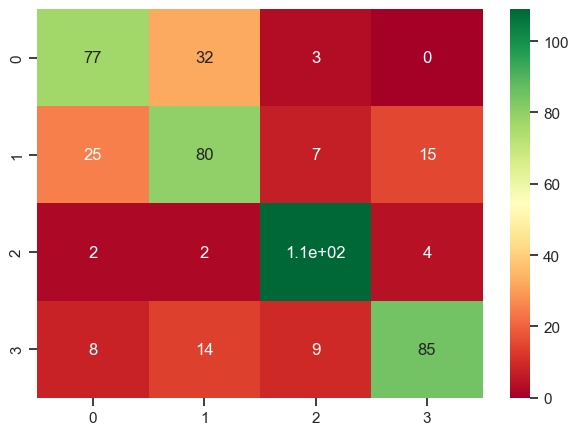

In [209]:
sns.heatmap(con_mat, annot=True, cmap='RdYlGn')

#### accuracy_score

In [206]:
accuracy=accuracy_score(y_test, y_pred)
accuracy

0.7436440677966102

#### classification_report 

In [211]:
pd.DataFrame({'y_test':y_test, 'y_pred':y_pred}).info()

<class 'pandas.core.frame.DataFrame'>
Index: 472 entries, 5617 to 328
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y_test  472 non-null    int64
 1   y_pred  472 non-null    int64
dtypes: int64(2)
memory usage: 11.1 KB


In [218]:
classi_report = classification_report(y_test, y_pred)
print(classi_report)

              precision    recall  f1-score   support

           0       0.69      0.69      0.69       112
           1       0.62      0.63      0.63       127
           2       0.85      0.93      0.89       117
           3       0.82      0.73      0.77       116

    accuracy                           0.74       472
   macro avg       0.75      0.75      0.74       472
weighted avg       0.74      0.74      0.74       472



### building tree

[Text(0.6557958698539704, 0.9791666666666666, 'x[1] <= 0.15\ngini = 0.75\nsamples = 1887\nvalue = [488.0, 473.0, 486.0, 440.0]'),
 Text(0.36249527750381777, 0.9375, 'x[4] <= 21.7\ngini = 0.702\nsamples = 1429\nvalue = [448.0, 465.0, 86.0, 430.0]'),
 Text(0.5091455736788941, 0.9583333333333333, 'True  '),
 Text(0.11544922372104861, 0.8958333333333334, 'x[4] <= 10.5\ngini = 0.392\nsamples = 448\nvalue = [6, 49, 51, 342]'),
 Text(0.046424026469839653, 0.8541666666666666, 'x[4] <= 7.2\ngini = 0.191\nsamples = 280\nvalue = [0, 0, 30, 250]'),
 Text(0.029320437770425044, 0.8125, 'x[0] <= 1.2\ngini = 0.103\nsamples = 202\nvalue = [0, 0, 11, 191]'),
 Text(0.026062611351488928, 0.7708333333333334, 'x[3] <= 18.0\ngini = 0.095\nsamples = 201\nvalue = [0, 0, 10, 191]'),
 Text(0.01628913209468058, 0.7291666666666666, 'x[5] <= 100.575\ngini = 0.234\nsamples = 59\nvalue = [0, 0, 8, 51]'),
 Text(0.013031305675744464, 0.6875, 'x[5] <= 100.27\ngini = 0.426\nsamples = 26\nvalue = [0, 0, 8, 18]'),
 Text(0.

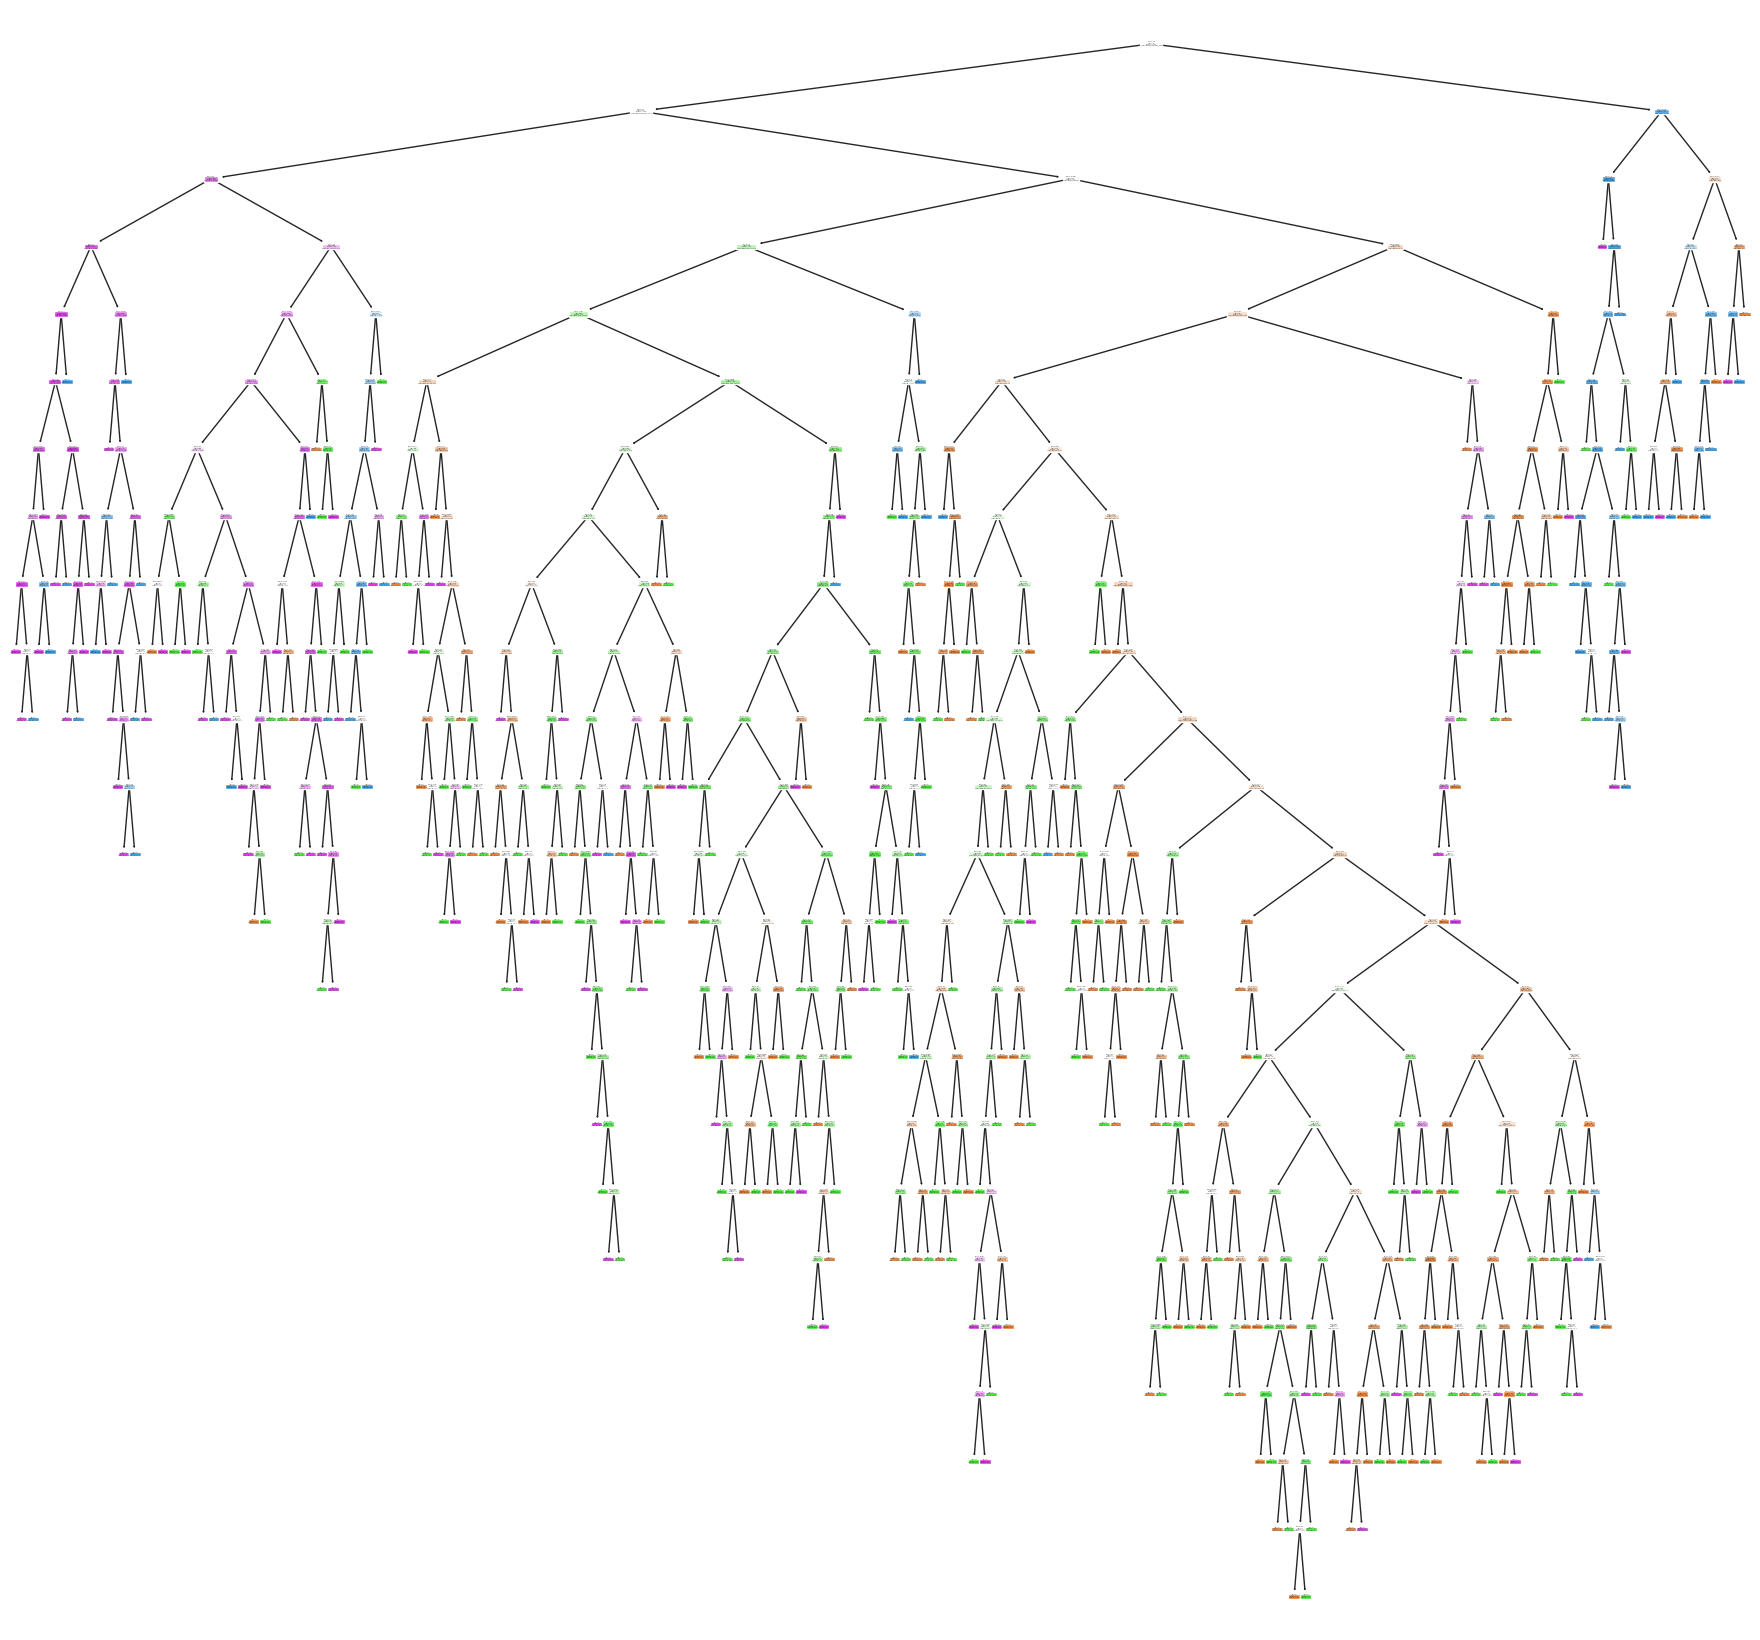

In [223]:
plt.figure(figsize=(20,20))

from sklearn import tree
tree.plot_tree(decision_tree_model, filled=True)

## building multiple models

In [224]:
from sklearn.linear_model import LogisticRegression    # LogisticRegression
from sklearn.tree import DecisionTreeClassifier        # DecisionTree  Classifier
from sklearn.ensemble import RandomForestClassifier    # RandomForest  Classifier
from sklearn.naive_bayes import GaussianNB             # NaiveBayes
from sklearn.neighbors import KNeighborsClassifier     # KNN-KNearestNeighbor Classifier
from sklearn.svm import SVC                            # SVM - ServiceVectorMachine

In [229]:
# creating object of each model

lgr=LogisticRegression()      # LogisticRegresion
dtc=DecisionTreeClassifier()  # DecisionTree_Classifier
rfc=RandomForestClassifier()  # RandomForest_Classifier
nb=GaussianNB()               # Naive_Bayes
knn=KNeighborsClassifier()   # KNN
svm=SVC()                     # svm

In [230]:
model_list = [lgr, dtc, rfc, nb, knn, svm]

In [240]:
accu_score = []
for model in model_list:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accu=accuracy_score(y_test,y_pred)
    accu_score.append(accu)
    print(f'{model} : {accu}')
    
print('--------------------------------------------------------------')
print(accu_score)

LogisticRegression() : 0.6885593220338984
DecisionTreeClassifier() : 0.7478813559322034
RandomForestClassifier() : 0.788135593220339
GaussianNB() : 0.6822033898305084
KNeighborsClassifier() : 0.7182203389830508
SVC() : 0.6970338983050848
--------------------------------------------------------------
[0.6885593220338984, 0.7478813559322034, 0.788135593220339, 0.6822033898305084, 0.7182203389830508, 0.6970338983050848]


In [245]:
model_list

[LogisticRegression(),
 DecisionTreeClassifier(),
 RandomForestClassifier(),
 GaussianNB(),
 KNeighborsClassifier(),
 SVC()]

In [247]:
accu_score

[0.6885593220338984,
 0.7478813559322034,
 0.788135593220339,
 0.6822033898305084,
 0.7182203389830508,
 0.6970338983050848]

In [286]:
pd.DataFrame({'model':[model.__class__.__name__ for model in model_list], 'accuracy':accu_score})

,model,accuracy
0,LogisticRegression,0.688559
1,DecisionTreeClassifier,0.747881
2,RandomForestClassifier,0.788136
3,GaussianNB,0.682203
4,KNeighborsClassifier,0.718220
5,SVC,0.697034


# RandomForest is more accurate among all models

### k-fold cross validation

In [263]:
# we usek-fold croiss validation to check our output by considering the RandomForest model

from sklearn.model_selection import cross_val_score
score=cross_val_score(rfc, x_1, y, scoring='accuracy', cv=5)
print(f'cross_validation_sscore : {score}')
print(f'mean_accuracy :  {np.mean(score)}')    #score.mean()

cross_validation_sscore : [0.5529661  0.5720339  0.63983051 0.6440678  0.55201699]
mean_accuracy :  0.59218305804455


### hyper_parameter tunning / model tunning

#### GridSearchCV

In [276]:
params= {'n_estimators':[50,100] ,'max_features':['sqrt', 'log2', None]} # parameters

from sklearn.model_selection import GridSearchCV
gscv=GridSearchCV(rfc, params, scoring='accuracy', cv=5)
gscv.fit(x_train, y_train)

# when we run it checks all parameters and gives the best posibility combination

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [283]:
print(f'best_params_ : {gscv.best_params_}')
print(f'best_score_  : {gscv.best_score_}')
print(f'best_estimator_  : {gscv.best_estimator_}')

best_params_ : {'max_features': 'log2', 'n_estimators': 50}
best_score_  : 0.8102830758003172
best_estimator_  : RandomForestClassifier(max_features='log2', n_estimators=50)


#### new_model (rfc_new)

In [278]:
rfc_new=RandomForestClassifier(max_features='log2', n_estimators=50)
rfc_new.fit(x_train,y_train)

RandomForestClassifier(max_features='log2', n_estimators=50)

In [281]:
y_pred_new=rfc_new.predict(x_test)

accuracy_score(y_test, y_pred_new)

0.788135593220339

### RandomizedSerachCV

In [303]:
# to find out the best parameters out of above parameters

params = {
    'n_estimators':[100, 500],
    'max_depth': [2, 20],
    'min_samples_split': [2, 11],
    'min_samples_leaf': [1, 11]
}

# Perform RandomizedSearchCV
rscv = RandomizedSearchCV(rfc, params, n_iter=50, scoring='accuracy', cv=5, random_state=42)
rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50,
                   param_distributions={'max_depth': [2, 20],
                                        'min_samples_leaf': [1, 11],
                                        'min_samples_split': [2, 11],
                                        'n_estimators': [100, 500]},
                   random_state=42, scoring='accuracy')

In [304]:
print(f'best_params_ : {rscv.best_params_}')
print(f'best_score_  : {rscv.best_score_}')
print(f'best_estimator_  : {rscv.best_estimator_}')

best_params_ : {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
best_score_  : 0.8044517423827768
best_estimator_  : RandomForestClassifier(max_depth=20, random_state=42)


In [309]:
rfc_new1=RandomForestClassifier(n_estimators= 100, min_samples_split=2, min_samples_leaf= 1,max_depth=20, random_state=42)
rfc_new1.fit(x_train,y_train)

RandomForestClassifier(max_depth=20, random_state=42)

In [310]:
y_pred_new1=rfc_new1.predict(x_test)

accuracy_score(y_test, y_pred_new1)

0.7902542372881356

### Conclusion

#### both rfc_new & rfc_new1 are good models after huyperparameter tunning but rfc_new1 has 79% accuracy

In [313]:
import pickle
pickle.dump(rfc_new1, open('rfc_new1.pickle','wb'))  # save the model

In [314]:
pickle.load(open('rfc_new1.pickle','rb'))  # load the model

RandomForestClassifier(max_depth=20, random_state=42)